# Vizualization project - interactive notebook version

## Dataset loading and preprocessing

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("ncr_ride_bookings.csv", parse_dates=["Date"])
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [3]:
location_to_district = {
    'AIIMS': 'SOUTH',
    'Adarsh Nagar': 'NORTH',
    'Akshardham': 'EAST',
    'Ambience Mall': 'OUTSIDE',  # Gurgaon
    'Anand Vihar': 'EAST',
    'Anand Vihar ISBT': 'EAST',
    'Ardee City': 'OUTSIDE',  # Gurgaon
    'Arjangarh': 'SOUTH',
    'Ashok Park Main': 'WEST',
    'Ashok Vihar': 'NORTH WEST',
    'Ashram': 'SOUTH',
    'Aya Nagar': 'SOUTH',
    'Azadpur': 'NORTH WEST',
    'Badarpur': 'SOUTH',
    'Badshahpur': 'OUTSIDE',  # Gurgaon
    'Bahadurgarh': 'OUTSIDE',  # Haryana
    'Barakhamba Road': 'CENTRAL',
    'Basai Dhankot': 'OUTSIDE',  # Faridabad
    'Bhikaji Cama Place': 'SOUTH',
    'Bhiwadi': 'OUTSIDE',  # Rajasthan
    'Botanical Garden': 'OUTSIDE',  # Greater Noida
    'Central Secretariat': 'NEW DELHI',
    'Chanakyapuri': 'CENTRAL',
    'Chandni Chowk': 'CENTRAL',
    'Chhatarpur': 'SOUTH',
    'Chirag Delhi': 'SOUTH',
    'Civil Lines Gurgaon': 'OUTSIDE',  # Gurgaon
    'Connaught Place': 'CENTRAL',
    'Cyber Hub': 'OUTSIDE',  # Gurgaon
    'DLF City Court': 'OUTSIDE',  # Gurgaon
    'DLF Phase 3': 'OUTSIDE',  # Gurgaon
    'Delhi Gate': 'CENTRAL',
    'Dilshad Garden': 'EAST',
    'Dwarka Mor': 'WEST',
    'Dwarka Sector 21': 'SOUTH WEST',
    'Faridabad Sector 15': 'OUTSIDE',  # Faridabad
    'GTB Nagar': 'NORTH',
    'Ghaziabad': 'OUTSIDE',
    'Ghitorni': 'SOUTH',
    'Ghitorni Village': 'SOUTH',
    'Golf Course Road': 'OUTSIDE',  # Gurgaon
    'Govindpuri': 'SOUTH',
    'Greater Kailash': 'SOUTH',
    'Greater Noida': 'OUTSIDE',
    'Green Park': 'SOUTH',
    'Gurgaon Railway Station': 'OUTSIDE',
    'Gurgaon Sector 29': 'OUTSIDE',
    'Gurgaon Sector 56': 'OUTSIDE',
    'Gwal Pahari': 'OUTSIDE',  # Gurgaon
    'Hauz Khas': 'SOUTH',
    'Hauz Rani': 'SOUTH',
    'Hero Honda Chowk': 'OUTSIDE',  # Gurgaon
    'Huda City Centre': 'OUTSIDE',  # Gurgaon
    'IFFCO Chowk': 'OUTSIDE',  # Gurgaon
    'IGI Airport': 'SOUTH WEST',
    'IGNOU Road': 'SOUTH',
    'IIT Delhi': 'SOUTH',
    'IMT Manesar': 'OUTSIDE',  # Haryana
    'INA Market': 'SOUTH',
    'ITO': 'CENTRAL',
    'Inderlok': 'NORTH WEST',
    'India Gate': 'NEW DELHI',
    'Indirapuram': 'OUTSIDE',  # Ghaziabad
    'Indraprastha': 'EAST',
    'Jahangirpuri': 'NORTH WEST',
    'Jama Masjid': 'CENTRAL',
    'Janakpuri': 'WEST',
    'Jasola': 'SOUTH',
    'Jhilmil': 'EAST',
    'Jor Bagh': 'SOUTH',
    'Kadarpur': 'OUTSIDE',  # Gurgaon
    'Kalkaji': 'SOUTH',
    'Kanhaiya Nagar': 'NORTH WEST',
    'Karkarduma': 'EAST',
    'Karol Bagh': 'CENTRAL',
    'Kashmere Gate': 'NORTH',
    'Kashmere Gate ISBT': 'NORTH',
    'Kaushambi': 'OUTSIDE',  # Ghaziabad
    'Keshav Puram': 'NORTH WEST',
    'Khan Market': 'NEW DELHI',
    'Khandsa': 'OUTSIDE',  # Gurgaon
    'Kherki Daula Toll': 'OUTSIDE',  # Gurgaon
    'Kirti Nagar': 'WEST',
    'Lajpat Nagar': 'SOUTH',
    'Lal Quila': 'CENTRAL',
    'Laxmi Nagar': 'EAST',
    'Lok Kalyan Marg': 'NEW DELHI',
    'MG Road': 'OUTSIDE',  # Gurgaon
    'Madipur': 'WEST',
    'Maidan Garhi': 'SOUTH',
    'Malviya Nagar': 'SOUTH',
    'Mandi House': 'CENTRAL',
    'Manesar': 'OUTSIDE',  # Haryana
    'Mansarovar Park': 'EAST',
    'Mayur Vihar': 'EAST',
    'Meerut': 'OUTSIDE',
    'Mehrauli': 'SOUTH',
    'Model Town': 'NORTH',
    'Moolchand': 'SOUTH',
    'Moti Nagar': 'WEST',
    'Mundka': 'WEST',
    'Munirka': 'SOUTH',
    'Narsinghpur': 'OUTSIDE',  # Haryana
    'Nawada': 'SOUTH WEST',
    'Nehru Place': 'SOUTH',
    'Netaji Subhash Place': 'NORTH WEST',
    'New Colony': 'SOUTH',
    'NEW DELHI Railway Station': 'NEW DELHI',
    'Nirman Vihar': 'EAST',
    'Noida Extension': 'OUTSIDE',
    'Noida Film City': 'OUTSIDE',
    'Noida Sector 18': 'OUTSIDE',
    'Noida Sector 62': 'OUTSIDE',
    'Okhla': 'SOUTH',
    'Old Gurgaon': 'OUTSIDE',
    'Paharganj': 'CENTRAL',
    'Palam Vihar': 'OUTSIDE',  # Gurgaon
    'Panchsheel Park': 'SOUTH',
    'Panipat': 'OUTSIDE',
    'Paschim Vihar': 'WEST',
    'Pataudi Chowk': 'OUTSIDE',  # Haryana
    'Patel Chowk': 'NEW DELHI',
    'Peeragarhi': 'WEST',
    'Pitampura': 'NORTH WEST',
    'Pragati Maidan': 'CENTRAL',
    'Preet Vihar': 'EAST',
    'Pulbangash': 'NORTH',
    'Punjabi Bagh': 'WEST',
    'Qutub Minar': 'SOUTH',
    'RK Puram': 'SOUTH',
    'Raj Nagar Extension': 'OUTSIDE',  # Ghaziabad
    'Rajiv Chowk': 'CENTRAL',
    'Rajiv Nagar': 'OUTSIDE',  # Gurgaon
    'Rajouri Garden': 'WEST',
    'Ramesh Nagar': 'WEST',
    'Rithala': 'NORTH WEST',
    'Rohini': 'NORTH WEST',
    'Rohini East': 'NORTH EAST',
    'Rohini West': 'NORTH WEST',
    'Sadar Bazar Gurgaon': 'OUTSIDE',
    'Saidulajab': 'SOUTH',
    'Saket': 'SOUTH',
    'Saket A Block': 'SOUTH',
    'Samaypur Badli': 'NORTH',
    'Sarai Kale Khan': 'SOUTH',
    'Sarojini Nagar': 'SOUTH',
    'Satguru Ram Singh Marg': 'OUTSIDE',  # Gurgaon
    'Seelampur': 'EAST',
    'Shahdara': 'Shahdara',
    'Shastri Nagar': 'NORTH WEST',
    'Shastri Park': 'EAST',
    'Shivaji Park': 'WEST',
    'Sikanderpur': 'OUTSIDE',  # Gurgaon
    'Sohna Road': 'OUTSIDE',  # Gurgaon
    'Sonipat': 'OUTSIDE',
    'South Extension': 'SOUTH',
    'Subhash Chowk': 'OUTSIDE',  # Gurgaon
    'Subhash Nagar': 'WEST',
    'Sultanpur': 'SOUTH',
    'Sushant Lok': 'OUTSIDE',  # Gurgaon
    'Tagore Garden': 'WEST',
    'Tilak Nagar': 'WEST',
    'Tis Hazari': 'NORTH',
    'Tughlakabad': 'SOUTH',
    'Udyog Bhawan': 'NEW DELHI',
    'Udyog Vihar': 'OUTSIDE',  # Gurgaon
    'Udyog Vihar Phase 4': 'OUTSIDE',
    'Uttam Nagar': 'WEST',
    'Vaishali': 'OUTSIDE',  # Ghaziabad
    'Vasant Kunj': 'SOUTH',
    'Vatika Chowk': 'OUTSIDE',  # Gurgaon
    'Vidhan Sabha': 'NORTH',
    'Vinobapuri': 'SOUTH',
    'Vishwavidyalaya': 'NORTH',
    'Welcome': 'EAST',
    'Yamuna Bank': 'EAST'
}

# Example usage:
def get_admin_region(place):
    return location_to_district.get(place.title().strip(), "UNKNOWN")
def transform_column(series: pd.Series) -> pd.Series:
    return series.apply(get_admin_region)


In [4]:
df["Pickup region"] = transform_column(df["Pickup Location"])
df["Drop region"]   = transform_column(df["Drop Location"])

In [5]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Pickup region,Drop region
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OUTSIDE,EAST
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,NORTH WEST,OUTSIDE
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,OUTSIDE,SOUTH
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI,NEW DELHI,NORTH WEST
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI,SOUTH,NEW DELHI


In [6]:
# Change all object types to categorical types
for col in df.select_dtypes(include="object"):
    df[col] = df[col].astype("category")

# Change Cancelled Rides by Driver / Customer and Incomplete Rides to boolean type
df["Cancelled Rides by Customer"] = df["Cancelled Rides by Customer"].notna().astype("bool")
df["Cancelled Rides by Driver"] = df["Cancelled Rides by Driver"].notna().astype("bool")
df["Incomplete Rides"] = df["Incomplete Rides"].notna().astype("bool")

# Add average speed attribute in km/h
df["Avg Speed"] = df["Ride Distance"] / (df["Avg CTAT"] / 60)

# Add weekday and hour columns
df["Weekday"] = df["Date"].dt.day_name()
df["Hour"] = df["Time"].str.split(":").str[0]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               150000 non-null  datetime64[ns]
 1   Time                               150000 non-null  category      
 2   Booking ID                         150000 non-null  category      
 3   Booking Status                     150000 non-null  category      
 4   Customer ID                        150000 non-null  category      
 5   Vehicle Type                       150000 non-null  category      
 6   Pickup Location                    150000 non-null  category      
 7   Drop Location                      150000 non-null  category      
 8   Avg VTAT                           139500 non-null  float64       
 9   Avg CTAT                           102000 non-null  float64       
 10  Cancelled Rides by C

In [8]:
import geopandas as gpd, pandas as pd, matplotlib.pyplot as plt

shp = "input/DISTRICT_BOUNDARY.shp"
gdf = gpd.read_file(shp)
gdf["District"] = gdf["District"].str.replace(">", "").str.strip()
gdf["STATE"]    = gdf["STATE"].str.replace(">", "").str.strip()
delhi = gdf[gdf["STATE"] == "DELHI"].to_crs(epsg=32644)
delhi["centroid"] = delhi.geometry.centroid

delhi.head()

,District,STATE,REMARKS,State_LGD,DISTRICT_L,Shape_Leng,Shape_Area,geometry,centroid
79,CENTRAL,DELHI,None,7,77,92366.024115,1.031860e+08,"POLYGON ((130368.065 3190077.582, 130456.57 31...",POINT (130968.479 3178547.824)
127,EAST,DELHI,None,7,78,24536.830597,3.051072e+07,"POLYGON ((137184.873 3175724.729, 137241.826 3...",POINT (138629.656 3171704.761)
266,NEW DELHI,DELHI,None,7,79,80699.250792,1.516238e+08,"POLYGON ((128828.841 3174350.666, 128864.385 3...",POINT (123199.496 3167202.359)
269,NORTH,DELHI,None,7,80,110611.976578,2.821832e+08,"POLYGON ((119429.859 3199919.422, 119509.08 31...",POINT (119985.502 3191331.213)
272,NORTH EAST,DELHI,None,7,81,47370.029510,3.420590e+07,"POLYGON ((132426.173 3188401.97, 132439.724 31...",POINT (134278.364 3183000.625)


In [ ]:
flows = (
    df
    .groupby(["Pickup region", "Drop region"])
    .size()                                 # counts rows → the “volume”
    .reset_index(name="volume")             # turn the Series back into a DF
)

print(flows)

In [13]:
valid_names = set(delhi["District"])

flows = flows[
    flows["Pickup region"].isin(valid_names) &
    flows["Drop region"].isin(valid_names)
].reset_index(drop=True)


In [11]:
lookup = delhi.set_index("District")["centroid"]

In [16]:
from shapely.geometry import LineString

def make_line(row):
    """
    Returns a straight LineString connecting the centroid of the origin
    district to the centroid of the destination district.
    """
    origin_pt = lookup[row["Pickup region"]]
    dest_pt   = lookup[row["Drop region"]]
    return LineString([origin_pt, dest_pt])

# Add a geometry column with the flow lines
flows["geometry"] = flows.apply(make_line, axis=1)

# Convert the plain DataFrame into a GeoDataFrame (same CRS as `delhi`)
gdf_flows = gpd.GeoDataFrame(flows,
                             geometry="geometry",
                             crs=delhi.crs)


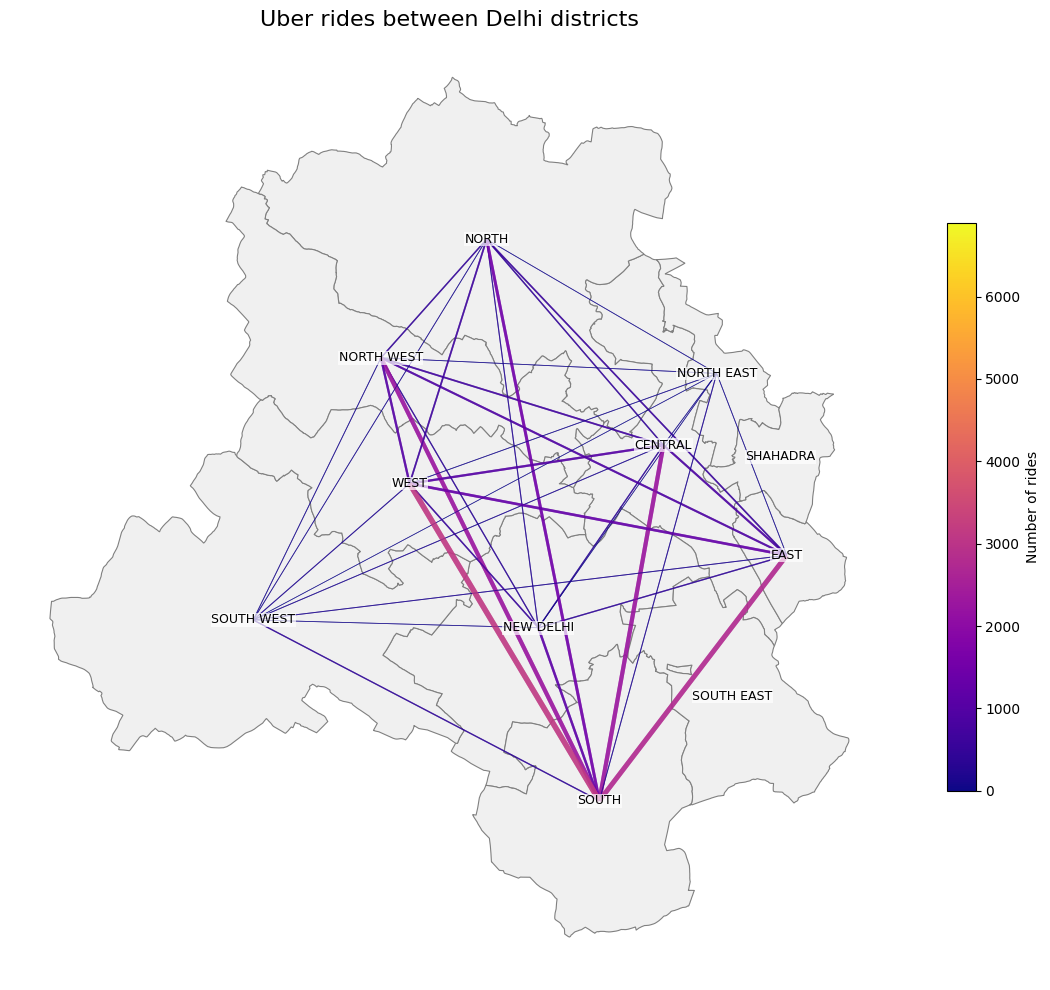

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# 5‑a) Plot the Delhi districts (light fill, grey borders)
delhi.plot(ax=ax,
           edgecolor="gray",
           facecolor="#f0f0f0",
           linewidth=0.8)

# 5‑b) Scale line width by flow volume
max_w, min_w = 8, 0.5
vmin, vmax = gdf_flows["volume"].min(), gdf_flows["volume"].max()
lw = (gdf_flows["volume"] - vmin) / (vmax - vmin) * (max_w - min_w) + min_w

# 5‑c) Plot the flow lines, colour‑coded by volume
gdf_flows.plot(ax=ax,
               linewidth=lw,
               alpha=0.7,
               cmap="plasma",
               column="volume",
               legend=True,
               legend_kwds={"label": "Number of rides", "shrink": 0.6})

# 5‑d) Optional: label each district
for _, r in delhi.iterrows():
    ax.text(r.centroid.x, r.centroid.y, r.District,
            ha="center", va="center", fontsize=9,
            bbox=dict(facecolor="white", edgecolor="none", pad=0.3, alpha=0.7))

ax.set_axis_off()
plt.title("Uber rides between Delhi districts", fontsize=16)
plt.tight_layout()
plt.show()

## DASH

In [36]:
from dash import Dash, html, dcc, Input, Output
app = Dash(__name__)

In [37]:
app.layout = html.Div(
    style={"fontFamily": "Arial, sans-serif", "margin": "2rem"},
    children=[
        # title --------------------------------------------------------------------------------------------
        html.H1("Uber Rides Data"),
        html.P([
            "The dataset contains rides from 2024 from NEW DELHI, India. It was taken from ",
            html.A(
                "this Kaggle dataset",
                href="https://www.kaggle.com/datasets/yashdevladdha/uber-ride-analytics-dashboard",
                target="_blank"
            ),
            "."
        ]),
        html.Hr(style={"margin-bottom": "10px"}),

        # main part -----------------------------------------------------------------------------------------
        html.Div(children=[

            html.Div( # rides count
                html.H2(id="rides-count"),
                id="rides-count-container"
            ),


            html.Div( # Date range picker div
                children = [
                    html.Label("Date Range", style={"margin":"5px"}),
                    dcc.DatePickerRange(
                        id="date-range-picker",
                        min_date_allowed=pd.Timestamp("2024-01-01"),
                        max_date_allowed=pd.Timestamp("2024-12-31"),
                        start_date=pd.Timestamp("2024-01-01"),
                        end_date=pd.Timestamp("2024-12-31"),
                        display_format="YYYY‑MM‑DD",
                    ),
                ],
                style={"margin":"5px"}
            ),


            html.Div(
                children=[ # Vehicle type checkboxes div
                    html.Label("Vehicle type"),
                    dcc.Checklist(
                        options=[
                            {"label": "Auto (Auto-rickshaw)", "value": "Auto"},
                            {"label": "Go Mini (Low-cost small hatchbacks)", "value": "Go Mini"},
                            {"label": "Go Sedan (Standard sedans)", "value": "Go Sedan"},
                        {"label": "Bike (Motorcycles)", "value": "Bike"},
                            {"label": "Premier Sedan (Premium/luxury sedans)", "value": "Premier Sedan"},
                            {"label": "eBike (Electric motorcycle rides)", "value": "eBike"},
                            {"label": "Uber XL (Larger vehicles - SUVs or 6–7 seaters)", "value": "Uber XL"}
                        ],
                        value=["Auto", "Go Mini", "Go Sedan", "Bike", "Premier Sedan", "eBike", "Uber XL"],
                        id="vehicle-types-checklist"
                    )
                ],
                style={"margin":"20px 0"}
            ),



            html.Div( # Vehicle types barchart
                children=[
                    html.H3("Vehicle types barchart"),
                    dcc.Graph(id="vehicle-types-barchart"),
                ],
                id="vehicle-types-barchart-container",
                style={"margin":"20px 0"}
            ),


            html.Div( # Scatterplot
                children=[
                    html.H3("Numerical attributes scatterplot"),
                    dcc.Dropdown(
                        options=[
                            {"label":"Average Time - driver to pickup location", "value":"Avg VTAT"},
                            {"label":"Average Time - pickup to destination", "value":"Avg CTAT"},
                            {"label":"Booking Value", "value":"Booking Value"},
                            {"label":"Ride Distance", "value":"Ride Distance"},
                            {"label":"Driver Ratings", "value":"Driver Ratings"},
                            {"label":"Customer Ratings", "value":"Customer Rating"},
                            {"label":"Average Speed", "value":"Avg Speed"},
                        ],
                        value="Ride Distance",
                        id="scatterplot-x-axis"
                    ),
                    dcc.Dropdown(
                        options=[
                            {"label":"Average Time - driver to pickup location", "value":"Avg VTAT"},
                            {"label":"Average Time - pickup to destination", "value":"Avg CTAT"},
                            {"label":"Booking Value", "value":"Booking Value"},
                            {"label":"Ride Distance", "value":"Ride Distance"},
                            {"label":"Driver Ratings", "value":"Driver Ratings"},
                            {"label":"Customer Ratings", "value":"Customer Rating"},
                            {"label":"Average Speed", "value":"Avg Speed"},
                        ],
                        value="Avg Speed",
                        id="scatterplot-y-axis"
                    ),
                    dcc.Graph(id="scatterplot"),
                ],
                id="scatterplot-container",
                style={"margin": "20px 0"}
            ),


            html.Div( # payment methods piechart
                children=[
                    html.H3("Payment methods piechart"),
                    dcc.Graph(id="payment-piechart")
                ],
                id="payment-piechart-container",
                style={"margin": "20px 0"}
            ),


            html.Div( # Rides volume area chart
                children=[
                    html.H3("Rides volume area chart"),
                    html.Label("Group by"),
                    dcc.RadioItems(
                        options=[
                            {"label": "Date", "value": "Date"},
                            {"label": "Weekday", "value": "Weekday"},
                            {"label": "Hour", "value": "Hour"},
                        ],
                        value="Date",
                        id="areachart-group-radio"
                    ),
                    dcc.Graph(id="areachart")
                ],
                id="areachart-container",
                style={"margin": "20px 0"}
            ),
            
            html.Div(
                children=[
                    html.H3("Ride Flow Map Between Delhi Districts"),
                    html.P("Showing movement patterns between different districts of NEW DELHI"),
                    html.Div(
                        id="flow-map-container",
                        children=[
                            html.Iframe(
                                id="flow-map",
                                srcDoc="",          # Filled by callback below
                                style={
                                    "width": "100%",
                                    "height": "600px",
                                    "border": "1px solid #ddd",
                                    "borderRadius": "5px"
                                }
                            )
                        ]
                    )
                ],
                style={"margin": "20px 0"}
            ),
        ])
    ],
)

### Callbacks

In [38]:
import plotly.express as px

#callback for total rides text
@app.callback(
    Output("rides-count", "children"),
    Input("date-range-picker", "start_date"),
    Input("date-range-picker", "end_date"),
    Input("vehicle-types-checklist", "value")
)
def update_total_rides(start_date, end_date, vehicle_types):
    count = len(df[
        (df["Date"] >= start_date) &
        (df["Date"] <= end_date) &
        (df["Vehicle Type"].isin(vehicle_types))
    ])

    return f"Total rides: {count}"


In [39]:
# callback for vehicle type barchart
@app.callback(
    Output("vehicle-types-barchart", "figure"),
    Input("date-range-picker", "start_date"),
    Input("date-range-picker", "end_date"),
    Input("vehicle-types-checklist", "value")
)
def update_vehicle_types_barchart(start_date, end_date, vehicle_types):
    filtered_df = df[
        (df["Date"] >= start_date) &
        (df["Date"] <= end_date) &
        (df["Vehicle Type"].isin(vehicle_types))
    ].groupby("Vehicle Type", observed=True).size().reset_index(name="Count")

    fig = px.bar(
        filtered_df,
        x="Vehicle Type",
        y="Count",
        color="Vehicle Type",
    )

    y_limit = (filtered_df["Count"].max() // 5_000 + 1) * 5000
    fig.update_layout(
        yaxis=dict(range=[0, y_limit], title="Count"),
        margin=dict(t=40, l=20, r=20, b=20)
    )
    return fig

In [40]:
#callback for scatterplot
@app.callback(
    Output("scatterplot", "figure"),
    Input("date-range-picker", "start_date"),
    Input("date-range-picker", "end_date"),
    Input("vehicle-types-checklist", "value"),
    Input("scatterplot-x-axis", "value"),
    Input("scatterplot-y-axis", "value")
)
def update_scatterplot(start_date, end_date, vehicle_types, x_axis_attribute, y_axis_attribute):
    filtered_df = df[
        (df["Date"] >= start_date) &
        (df["Date"] <= end_date) &
        (df["Vehicle Type"].isin(vehicle_types))
    ].dropna(subset=[x_axis_attribute, y_axis_attribute]) # drop any row where either is NaN

    fig = px.scatter(
        filtered_df,
        x=x_axis_attribute,
        y=y_axis_attribute
    )

    fig.update_layout(
        margin=dict(t=40, l=20, r=20, b=20)
    )

    return fig

In [41]:
# callback for payment method piechart
@app.callback(
    Output("payment-piechart", "figure"),
    Input("date-range-picker", "start_date"),
    Input("date-range-picker", "end_date"),
    Input("vehicle-types-checklist", "value"),
)
def update_payment_piechart(start_date, end_date, vehicle_types):
    filtered_df = df[
        (df["Date"] >= start_date) &
        (df["Date"] <= end_date) &
        (df["Vehicle Type"].isin(vehicle_types))
    ].groupby("Payment Method", observed=True).agg(
        Count=("Payment Method", "size"),
        Total_Revenue=("Booking Value", "sum")
    ).reset_index()

    fig = px.pie(
        filtered_df,
        names="Payment Method",
        values="Count",
        hole=0.5
    )

    fig.update_layout(
        annotations=[
        dict(
            text=f"<b>{int(filtered_df["Total_Revenue"].sum()):,} INR</b><br>Total Revenue <br>",
            x=0.5,
            y=0.5,
            font_size=18,
            showarrow=False,
            align="center"
        )
        ],
        margin=dict(t=40, l=20, r=20, b=20)
    )

    return fig

In [42]:
# callback for rides volume area chart
@app.callback(
    Output("areachart", "figure"),
    Input("date-range-picker", "start_date"),
    Input("date-range-picker", "end_date"),
    Input("vehicle-types-checklist", "value"),
    Input("areachart-group-radio", "value")
)
def update_areachart(start_date, end_date, vehicle_types, grouping):
    filtered_df = df[
        (df["Date"] >= start_date) &
        (df["Date"] <= end_date) &
        (df["Vehicle Type"].isin(vehicle_types))
    ].groupby(grouping, observed=True).agg(
        completed=("Booking Status", lambda x: (x=="Completed").sum()),
        not_completed=("Booking Status", lambda x: (x!="Completed").sum())
    ).reset_index()

    filtered_df.columns = [grouping, 'Completed', 'Incomplete or Cancelled']

    fig = px.area(
        filtered_df,
        x=grouping,
        y=filtered_df.columns[1:],
        labels={"value": "Number of Rides", "variable": "Booking Status"}
    )

    return fig

### Running the app

In [43]:
if __name__ == '__main__':
    app.run(jupyter_mode="external", debug=True) # inline/tab/external

Dash app running on http://127.0.0.1:8050/
